Plot_decision_regions

In [ ]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

        # konfiguruje generator znaczników i mapę kolorów
        markers = ('s', 'x', 'o', '^', 'v')
        colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
        cmap = ListedColormap(colors[:len(np.unique(y))])

        # rysuje wykres powierzchni decyzyjnej
        x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
        Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
        Z = Z.reshape(xx1.shape)
        plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
        plt.xlim(xx1.min(), xx1.max())
        plt.ylim(xx2.min(), xx2.max())

        # rysuje wykres wszystkich próbek
        for idx, cl in enumerate(np.unique(y)):
            plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl, edgecolor='black')

y_train_01_subset:  [ 1  1 -1 -1  1 -1 -1  1 -1 -1 -1 -1  1 -1 -1 -1  1 -1 -1  1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  1 -1  1 -1  1  1 -1  1  1
 -1 -1  1 -1 -1  1  1  1 -1 -1  1 -1  1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1  1  1 -1 -1 -1 -1  1 -1 -1 -1  1  1 -1  1 -1 -1 -1 -1  1 -1
 -1  1  1 -1  1 -1  1  1  1]
y_train_03_subset:  [-1 -1  1  1 -1  1  1 -1  1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1  1  1 -1 -1
 -1  1 -1  1  1  1 -1 -1  1  1  1  1 -1  1  1 -1  1 -1  1 -1 -1 -1 -1 -1
  1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1  1 -1 -1 -1  1 -1 -1 -1  1 -1
 -1  1  1 -1 -1 -1  1 -1  1  1 -1 -1  1  1 -1 -1  1 -1  1 -1 -1 -1 -1  1
 -1 -1 -1 -1 -1 -1 -1 -1 -1]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Perceptron #1 accuracy:  100.0
Perceptron #2 accuracy:  95.23809523809523
Total accuracy:  61.904761904761905


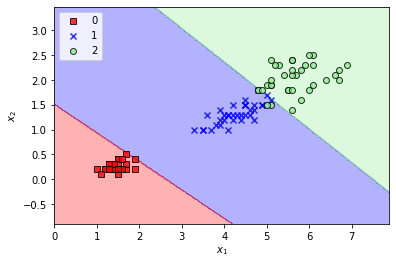

In [ ]:
import matplotlib.pylab as plt
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets


class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1+ X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X,y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update *xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)


class Classifier:
    def __init__(self, ppn1, ppn2):
        self.ppn1 = ppn1
        self.ppn2 = ppn2

    def predict(self, x):
        return np.where(self.ppn1.predict(x) == 1, 0, np.where(self.ppn2.predict(x) == 1, 2, 1))


def main():
    # Downloads test and training data
    iris = datasets.load_iris()
    X = iris.data[:, [2, 3]]
    y = iris.target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y) # Divide downloaded data into testing and training data

    y_train_01_subset = y_train.copy()
    y_train_03_subset = y_train.copy()
    X_train_01_subset = X_train.copy()

    y_train_01_subset[(y_train == 1) | (y_train == 2)] = -1
    y_train_01_subset[(y_train_01_subset == 0)] = 1

    y_train_03_subset[(y_train == 1) | (y_train == 0)] = -1
    y_train_03_subset[(y_train_03_subset == 2)] = 1

    print('y_train_01_subset: ', y_train_01_subset)
    print('y_train_03_subset: ', y_train_03_subset)

    # Models learn
    ppn1 = Perceptron(eta=0.1, n_iter=300) # Perceptron NO.1
    ppn1.fit(X_train_01_subset, y_train_01_subset)

    ppn2 = Perceptron(eta=0.1, n_iter=300) # Perceptron NO.2
    ppn2.fit(X_train_01_subset, y_train_03_subset)

    y1_predict = ppn1.predict(X_train)
    y3_predict = ppn2.predict(X_train)

    accuracy_1 = accuracy(ppn1.predict(X_train), y_train_01_subset)
    accuracy_3 = accuracy(ppn2.predict(X_train), y_train_03_subset)
    print("Perceptron #1 accuracy: ", accuracy_1)
    print("Perceptron #2 accuracy: ", accuracy_3)

    # Calculating accuracy for the whole set
    if accuracy_1 > accuracy_3:
        y_results = np.where(y1_predict == 0, 0, np.where(y3_predict == 1, 2, 1))
    else:
        y_results = np.where(y3_predict == 0, 2, np.where(y1_predict == 1, 0, 1))

    print("Total accuracy: ", accuracy(y_results, y_train))

    _classifier = Classifier(ppn1, ppn2)

    # Draws graph
    plot_decision_regions(X = X_train, y = y_train, classifier=_classifier)
    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$')
    plt.legend(loc='upper left')
    plt.show()

def accuracy(y_results, y_train):
    return (1 - np.mean(y_results != y_train)) * 100


if __name__ == '__main__':
    main()